 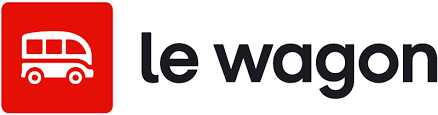


# Digital marketing analysis

#### **Load data**

a) Download and upload [`acquisition_facebook_adds.csv`](https://drive.google.com/file/d/1U4bXgai8KiEWLomvYqMAF-D-0zeKfU_l/view?usp=sharing) file in Google Colab.

b) Load `acquisition_facebook_adds.csv` data in a DataFrame named `df_facebook`.

In [1]:
import pandas as pd

In [2]:
df_facebook = pd.read_csv(r"C:\Users\ionel\Downloads\acquisition_facebook_adds.csv")

   #### **Data Discovery**
   

c) Print `df_facebook` DataFrame.

In [3]:
print(df_facebook)

             date   channel   spend
0      2019-08-01     Media   91.80
1      2019-08-01     Media   44.42
2      2019-08-01     Media   41.98
3      2019-08-01  Facebook    7.02
4      2019-08-01  Facebook    1.09
...           ...       ...     ...
73626  2019-01-18     Media   59.66
73627  2019-01-18     Media  126.23
73628  2019-01-18     Media   10.82
73629  2019-01-18     Media   13.90
73630  2019-01-18     Media  179.68

[73631 rows x 3 columns]


d) How many rows and columns are in this DataFrame ?

[73631 rows x 3 columns]


##### **Columns selection**

e) Select only `date` and `spend` columns of this DataFrame and save the result in a `df_facebook_date_spend` variable.

In [4]:
df_facebook[["date", "spend"]]

,date,spend
0,2019-08-01,91.80
1,2019-08-01,44.42
2,2019-08-01,41.98
3,2019-08-01,7.02
4,2019-08-01,1.09
...,...,...
73626,2019-01-18,59.66
73627,2019-01-18,126.23
73628,2019-01-18,10.82
73629,2019-01-18,13.90


In [5]:
df_facebook_date_spend = df_facebook[["date", "spend"]]

##### **Filtering**

f) Filter the `df_facebook` DataFrame only on the **Media** channel and save the result in a `df_facebook_media` variable.

In [6]:
df_facebook["channel"] == "Media"

0         True
1         True
2         True
3        False
4        False
         ...  
73626     True
73627     True
73628     True
73629     True
73630     True
Name: channel, Length: 73631, dtype: bool

In [7]:
df_facebook_media = df_facebook["channel"] == "Media"

g) Filter the `df_facebook` DataFrame only on Instagram channel the `2019-01-13`.

Save the result in a variable `df_facebook_instagram_20190113`.

We will save `df_facebook_instagram_20190113` to a csv file `acquisition_facebook_instagram_20190113.csv`.


In [8]:
df_facebook[(df_facebook["channel"] == "Instagram") & (df_facebook["date"] == "2019-01-13")]

,date,channel,spend
6415,2019-01-13,Instagram,0.00
6423,2019-01-13,Instagram,0.02
6438,2019-01-13,Instagram,7.69
6454,2019-01-13,Instagram,6.41
6471,2019-01-13,Instagram,7.43
...,...,...,...
12529,2019-01-13,Instagram,2.53
12546,2019-01-13,Instagram,0.83
12561,2019-01-13,Instagram,0.64
12575,2019-01-13,Instagram,0.03


In [9]:
df_facebook_instagram_20190113 = df_facebook[(df_facebook["channel"] == "Instagram") & (df_facebook["date"] == "2019-01-13")]

In [10]:
df_facebook_instagram_20190113.to_csv(r"C:\Users\ionel\OneDrive\Escritorio\Python\acquisition_facebook_instagram_20190113.csv") 

#### **Data Analysis**

###### **Cast a date column to datetime**

h) Convert the `date` column of the `df_facebook` DataFrame to datetime (a Python type for dates).

We'll use the `pd.to_datetime()` function to do this.

Have a look at the syntax in the course. Which **format** should you use here?

In [11]:
pd.to_datetime(df_facebook["date"], format="%Y-%m-%d")

0       2019-08-01
1       2019-08-01
2       2019-08-01
3       2019-08-01
4       2019-08-01
           ...    
73626   2019-01-18
73627   2019-01-18
73628   2019-01-18
73629   2019-01-18
73630   2019-01-18
Name: date, Length: 73631, dtype: datetime64[ns]

##### **Aggregate functions**

i) Over what time period does the data extend?

You can use the `.min()` and `.max()` aggregation functions on the `date` column

In [12]:
df_facebook["date"].min()

'2019-01-01'

In [13]:
df_facebook["date"].max()

'2019-10-18'

In [14]:
first = df_facebook["date"].min()
last = df_facebook["date"].max()

In [15]:
pd.to_datetime(last) - pd.to_datetime(first)

Timedelta('290 days 00:00:00')

j) Over the whole period, how much did Shapr spend?

We can use the aggregation function `.sum()` on the `spend` column.

In [16]:
df_facebook["spend"].sum()

1811170.169857

In [17]:
total_spend = df_facebook["spend"].sum()

In [18]:
print(total_spend)

1811170.169857


k) Calculate the amount of money spent by Shapr day by day.

To do this we will use the `.groupby()` function and then the `.sum()` aggregation function on the `spend` column.

We will store the result in a `df_facebook_daily` variable. Look at the syntax in the course colab.

**Use the argument as_index=False to get a DataFrame as result**.

In [19]:
df_facebook.groupby(["date"])["spend"].sum()

date
2019-01-01    4082.340000
2019-01-02    4737.440000
2019-01-03    5838.160000
2019-01-04    7793.200000
2019-01-05    8572.060000
                 ...     
2019-10-14     274.900000
2019-10-15     285.210008
2019-10-16     310.230002
2019-10-17     297.490002
2019-10-18      67.180000
Name: spend, Length: 291, dtype: float64

In [20]:
df_facebook_daily = df_facebook.groupby(["date"])["spend"].sum()

m) We would like to extend the analysis by looking at the marketing spend strategy by channel over time.

Calculate the amount spent per day per channel. We will store the result in a variable `df_facebook_channel_daily`.

**Use the argument as_index=False again to get a DataFrame as a result**

In [21]:
df_facebook.groupby(["date", "channel"])["spend"].sum()

date        channel  
2019-01-01  Facebook      706.210000
            Instagram    1406.140000
            Media        1969.990000
2019-01-02  Facebook      860.150000
            Instagram    1524.340000
                            ...     
2019-10-17  Instagram     146.470000
            Media          48.170002
2019-10-18  Facebook       15.930000
            Instagram      28.870000
            Media          22.380000
Name: spend, Length: 873, dtype: float64

In [22]:
df_facebook_channel_daily = df_facebook.groupby(["date", "channel"])["spend"].sum().reset_index()

In [23]:
df_facebook.groupby(["date", "channel"])["spend"].sum().reset_index()

,date,channel,spend
0,2019-01-01,Facebook,706.210000
1,2019-01-01,Instagram,1406.140000
2,2019-01-01,Media,1969.990000
3,2019-01-02,Facebook,860.150000
4,2019-01-02,Instagram,1524.340000
...,...,...,...
868,2019-10-17,Instagram,146.470000
869,2019-10-17,Media,48.170002
870,2019-10-18,Facebook,15.930000
871,2019-10-18,Instagram,28.870000


In [24]:
df_facebook_channel_daily

,date,channel,spend
0,2019-01-01,Facebook,706.210000
1,2019-01-01,Instagram,1406.140000
2,2019-01-01,Media,1969.990000
3,2019-01-02,Facebook,860.150000
4,2019-01-02,Instagram,1524.340000
...,...,...,...
868,2019-10-17,Instagram,146.470000
869,2019-10-17,Media,48.170002
870,2019-10-18,Facebook,15.930000
871,2019-10-18,Instagram,28.870000


n) We want to display these values in a graph.

Execute the code below to achieve this (we will have a specific lecture on visualisations in Python later in the bootcamp)

Comment Shaphr investments.

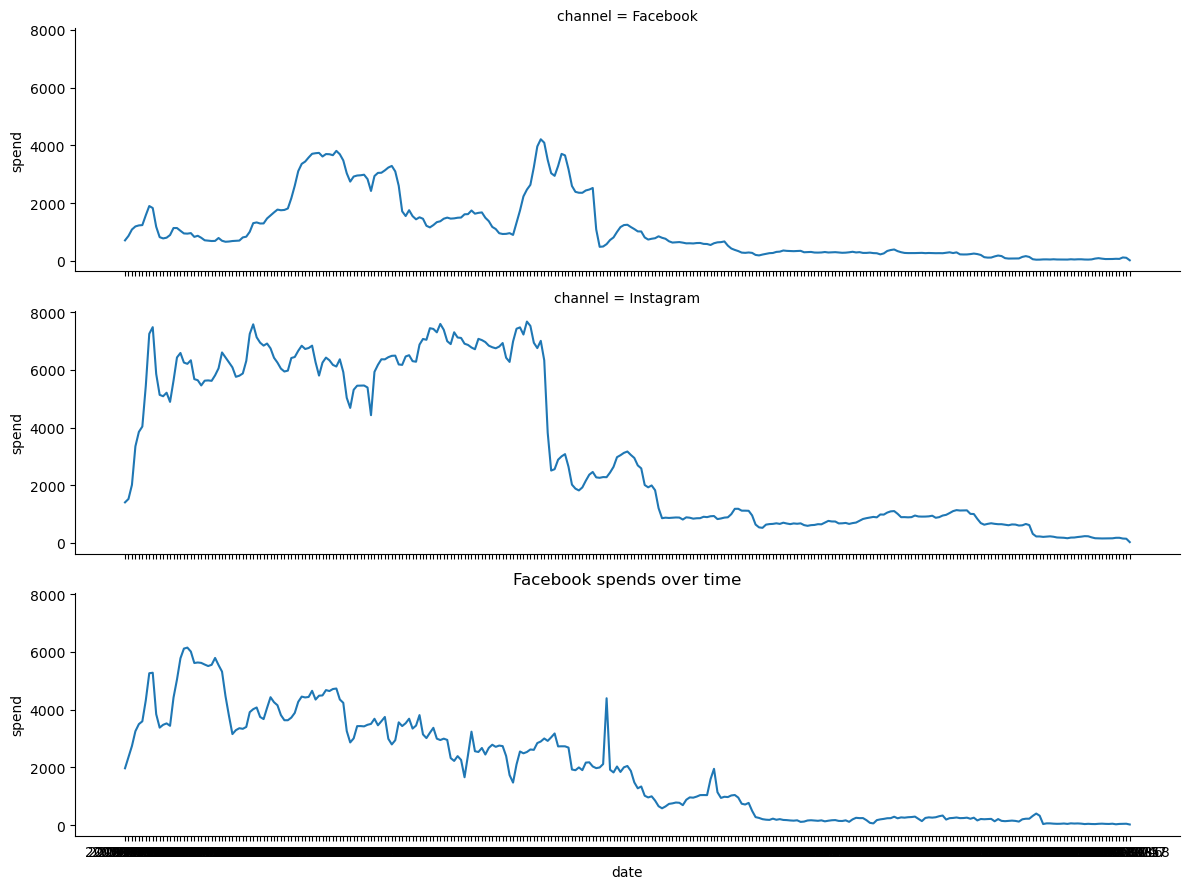

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(kind="line",
            data=df_facebook_channel_daily,
            x="date",
            y="spend",
            row="channel",
            height=3,
            aspect=12/3)
plt.xlabel("date")
plt.ylabel("spend")
plt.title("Facebook spends over time")
plt.show()

#### **Data Wrangling**

##### **Join two dataframes**

o) Load the file [`social_network_taxes.csv`](https://drive.google.com/file/d/1Lleeq3STLbX_wL6j6jNwlFt5eJRrIrAF/view?usp=sharing) into a `df_taxes` DataFrame and display it.

This represents the fee applied by each of the social networks as a tax  (not real numbers). I.e. for a fee of 0.10, if you invest 100 (spend=100), the social network takes 10 as tax.

In [32]:
df_taxes = pd.read_csv(r"C:\Users\ionel\OneDrive\Escritorio\Python\social_network_taxes.csv")

In [33]:
df_taxes

,channel,tax
0,Instagram,0.20
1,Facebook,0.15
2,Media,0.10


p) Join two DataFrames `df_facebook` and `df_taxes` and store the result in a variable `df_facebook`.

Display `df_facebook` DataFrame, which new column has just appeared?

Look at the syntax in your course.

In [27]:
df_facebook

,date,channel,spend
0,2019-08-01,Media,91.80
1,2019-08-01,Media,44.42
2,2019-08-01,Media,41.98
3,2019-08-01,Facebook,7.02
4,2019-08-01,Facebook,1.09
...,...,...,...
73626,2019-01-18,Media,59.66
73627,2019-01-18,Media,126.23
73628,2019-01-18,Media,10.82
73629,2019-01-18,Media,13.90


In [28]:
df_facebook = pd.merge(df_facebook, df_taxes, on=["channel"], how="inner")

In [29]:
df_facebook

,date,channel,spend,tax
0,2019-08-01,Media,91.80,0.1
1,2019-08-01,Media,44.42,0.1
2,2019-08-01,Media,41.98,0.1
3,2019-08-01,Media,32.09,0.1
4,2019-08-01,Media,32.89,0.1
...,...,...,...,...
73626,2019-01-18,Instagram,15.02,0.2
73627,2019-01-18,Instagram,31.19,0.2
73628,2019-01-18,Instagram,37.31,0.2
73629,2019-01-18,Instagram,49.31,0.2


q) Create a new column in `df_facebook` that corresponds to the spend column minus the tax.

We'll call this column `real_spend`.

Hint: You can think of the columns in a DataFrame as variables for doing arithmetic operations.

In [ ]:
for item in (df_taxes["tax"]):
    df_taxes["tax"].append(float(item))
print(df_taxes["tax"])

In [39]:
df_facebook["spend"] - df_facebook["tax"]*df_facebook["spend"]

0         82.620
1         39.978
2         37.782
3         28.881
4         29.601
          ...   
73626     12.016
73627     24.952
73628     29.848
73629     39.448
73630    205.168
Length: 73631, dtype: float64

In [40]:
df_facebook["real_spend"] = df_facebook["spend"] - df_facebook["tax"]*df_facebook["spend"]

In [41]:
df_facebook

,date,channel,spend,tax,real_spend
0,2019-08-01,Media,91.80,0.1,82.620
1,2019-08-01,Media,44.42,0.1,39.978
2,2019-08-01,Media,41.98,0.1,37.782
3,2019-08-01,Media,32.09,0.1,28.881
4,2019-08-01,Media,32.89,0.1,29.601
...,...,...,...,...,...
73626,2019-01-18,Instagram,15.02,0.2,12.016
73627,2019-01-18,Instagram,31.19,0.2,24.952
73628,2019-01-18,Instagram,37.31,0.2,29.848
73629,2019-01-18,Instagram,49.31,0.2,39.448


##### **Create a pivot table**

r) Make a pivot table with `date` as an index, channels as columns (from the `channel` column in the original table) and `real_spend` as values.

Choose `sum` function for aggregate function.

We will store the result in a variable `df_facebook_pivot`.

Refer to your course for the correct syntax.

**Don't forget to apply the `.reset_index()` function to recreate an index**.


In [42]:
#data = # to be completed
#values = "real_spend"
#index = "date"
#columns = "channel"
#aggfunc = sum

df_facebook_pivot = pd.pivot_table(df_facebook, values=["real_spend"], index=["date"], columns=["channel"] ,\
                                   aggfunc=sum).reset_index()

df_facebook_pivot

date   real_spend                       
channel                 Facebook Instagram        Media
0        2019-01-01   600.278500  1124.912  1772.991000
1        2019-01-02   731.127500  1219.472  2117.655000
2        2019-01-03   920.575500  1610.480  2467.827000
3        2019-01-04  1010.692500  2678.864  2930.013000
4        2019-01-05  1040.842000  3077.824  3150.234000
..              ...          ...       ...          ...
286      2019-10-14    57.349500   142.392    26.496000
287      2019-10-15    54.578503   143.152    37.854004
288      2019-10-16    96.985000   122.032    39.231002
289      2019-10-17    87.422500   117.176    43.353002
290      2019-10-18    13.540500    23.096    20.142000

[291 rows x 4 columns]

s) Save the values in a csv file `df_facebook_pivot.csv`.

In [43]:
df_facebook_pivot.to_csv(r"C:\Users\ionel\OneDrive\Escritorio\Python\df_facebook_pivot.csv") 

u) [Bonus] Are there multiple rows in  `df_facebook` for a same day and channel? If so, count the number of days for which this is the case per channel.